## Estatística Básica
Desenvolvido por: Janio de Souza Lima

Exemplos baseados prioritariamente no livro Estatística Básica (Toledo e Ovale, 1985) com adaptações feitas a partir dos exercícios, das funções nativas de Python e algumas bibliotecas complementares.

Quando é usado algum material complementar, sempre busquei colocar o link da fonte.

Estudo Dirigdo desse Notebook: https://youtube.com/playlist?list=PL0XxTDj23A1F4-nrAMDlRxvZkKJmCw2Qb

In [32]:
from datetime import datetime
from collections import Counter
import pandas as pd

#Bibliotecas matemáticas e estatísticas
import numpy as np
from scipy.stats import spearmanr
import statistics as sts
from scipy import stats as s

#Pacotes de machine learning e estatística
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

#Bibliotecas de visualização
from matplotlib import pyplot as plt
import seaborn as sns

## 1 Medidas de dispersão
Detalhes no capítulo 5 do livro

Média da produção: 
Empregado A: 70.0 
Empregado B: 71.0


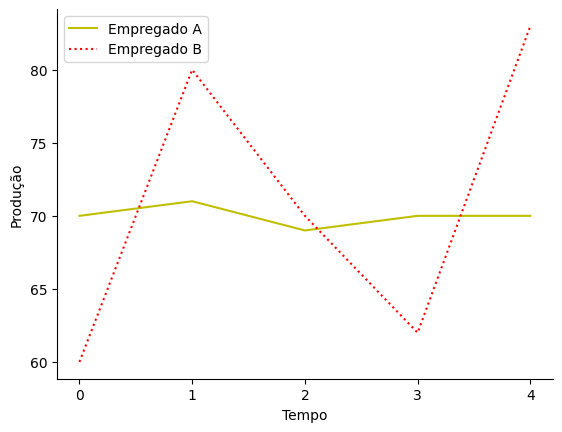

In [33]:
#Produção diária de dois empregados hipotéticos
empregadoA = [70, 71, 69, 70, 70]
empregadoB = [60, 80, 70, 62, 83]

#Média da produção
print('Média da produção:','\nEmpregado A:', np.mean(empregadoA),'\nEmpregado B:', np.mean(empregadoB))

#erando graficos e mudando so a cor
plt.plot(empregadoA, 'y')
plt.plot(empregadoB, 'r:')

#defininado os titulos dos eixos
plt.ylabel('Produção')
plt.xlabel('Tempo')
#defininco os valores do eixo x
plt.xticks([0,1,2,3,4])
#colocando a legenda e escolhendo a localização dela
plt.legend(['Empregado A', 'Empregado B'],loc='best')
#tirar as bordas do grafico
sns.despine()

## 1.2 Amplitude: avalia dimensão do conjunto de dados

In [34]:
"""
Amplitude
at = max(dados) - min(dados)
"""
at_empregadoA = max(empregadoA) - min(empregadoA)
at_empregadoB = max(empregadoB) - min(empregadoB)

print(f'Amplitude da produção dos empregados:\nA: {at_empregadoA}\nB: {at_empregadoB}')

Amplitude da produção dos empregados:
A: 2
B: 23


## 1.3 Desvio médio: média aritimética dos desvios em relação a uma das medidas de tendência central (média ou mediana)

1. Considera diferenças absolutas
2. Não é tão afetado por valores extremos com o desvio padrão
3. Quando calculado em relação à mediana tende a ser bem menor do que quando o cálculo é feito em relação a qualquer outra medida de tendência central

In [35]:
"""
Desvio médio
dm = (abs(soma(dados[k] - media) for k in dados)) / n

O mesmo cálculo poderia ser feito, substituindo a média pela mediana
Os valores de resultado seriam diferentes, mas a lógica seria similar,
considerando a distância das obsevações em relação à mediana
"""

#empregadoA = [70, 71, 69, 70, 70]
#empregadoB = [60, 80, 70, 62, 83]

#Cálculo da média e dimensão dos conjuntos de dados
mediaA = np.mean(empregadoA)
nA = len(empregadoA)

mediaB = np.mean(empregadoB)
nB = len(empregadoB)

#Cálculos dos desvios médios em 3 passos
#Cálculo da diferença entre cada observação e a média
dmA = [abs(empregadoA[k] - mediaA) for k in range(0, len(empregadoA))]
dmA = sum(dmA) #Soma das diferenças
dmA = dmA / nA #Obtenção do desvio médio

#Mesmo cálculo efetuado para o segundo conjunto de dados
dmB = [abs(empregadoB[k] - mediaB) for k in range(0, len(empregadoB))]
dmB = sum(dmB)
dmB = dmB / nB

print(f'Desvio médio da produção dos empregados:\nA: {dmA:.3f}\nB: {dmB:.3f}')

Desvio médio da produção dos empregados:
A: 0.400
B: 8.400


# 1.4 Outras medidas de dispersão:

### 1.4.1 Desvio padrão (S): avaliação de desvios em relação à média com base no quadrado dos desvios

In [36]:
"""
Desvio padrão
dp = sqrt(
          (soma(dados[k] - media for k in dados) ** 2) / n
          )

sqrt => Raiz quadrada
"""
#Cálculo direto com biblioteca numpy
dpA = np.std(empregadoA)

dpB = np.std(empregadoB)
print(f'Desvio padrão da produção dos empregados:\nA: {dpA:.3f}\nB: {dpB:.3f}') 

Desvio padrão da produção dos empregados:
A: 0.632
B: 9.252


In [37]:
#Cálculo manual

#Quadrado da diferença entre observações e a média
dpAm = [(empregadoA[k] - mediaA) ** 2 for k in range(0, len(empregadoA))]
dpBm = [(empregadoB[k] - mediaB) ** 2 for k in range(0, len(empregadoB))]

#Soma do quadrado das diferenças
dpAm = sum(dpAm)
dpBm = sum(dpBm)

#Soma dividida pela quantidade de elementos
dpAm = dpAm / nA
dpBm = dpBm / nB

#Obtenção do desvio padrão
dpAm = np.sqrt(dpAm)
dpBm = np.sqrt(dpBm)

print(dpAm,
      dpBm,
      sep='\n')

0.6324555320336759
9.252026804976301


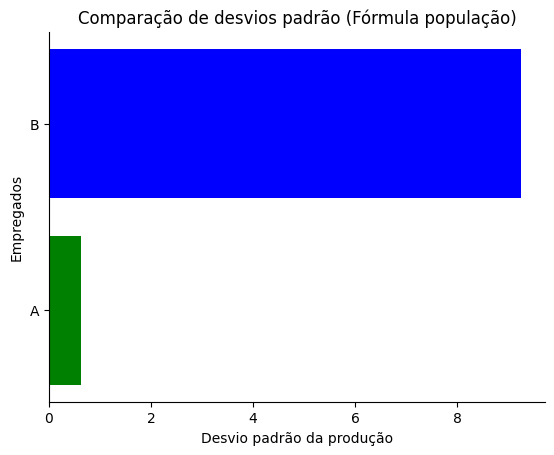

In [38]:
plt.barh(['A', 'B'],
         [dpAm, dpBm],
         color=['g', 'b'])
plt.title('Comparação de desvios padrão (Fórmula população)')
plt.ylabel('Empregados')
plt.xlabel('Desvio padrão da produção')
sns.despine()

In [39]:
"""
Desvio padrão para amostras
dp = sqrt(
          (soma(dados[k] - media for k in dados) ** 2) / (n - 1)
          )
O ajuste é realizado no divisor da fórmula que ao invés de n, considera n - 1
Isso ocorre para chegarmos a uma estimativa melhor do parâmetro de população.
"""

#Cálculo quando o conjunto de dados refere-se a uma amostra
#Quadrado da diferença entre observações e a média
dpAm = [(empregadoA[k] - mediaA) ** 2 for k in range(0, len(empregadoA))]
dpBm = [(empregadoB[k] - mediaB) ** 2 for k in range(0, len(empregadoB))]

#Soma do quadrado das diferenças
dpAm = sum(dpAm)
dpBm = sum(dpBm)

#Soma dividida pela quantidade de elementos
dpAm = dpAm / (nA - 1)
dpBm = dpBm / (nB - 1)

#Obtenção do desvio padrão
dpAm = np.sqrt(dpAm)
dpBm = np.sqrt(dpBm)

print(dpAm,
      dpBm,
      sep='\n')

0.7071067811865476
10.344080432788601


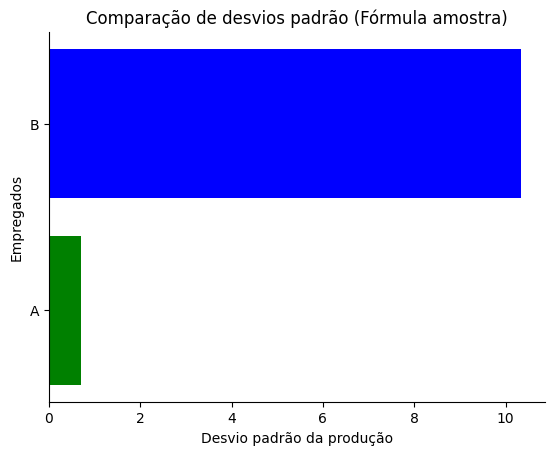

In [40]:
plt.barh(['A', 'B'],
         [dpAm, dpBm],
         color=['g', 'b'])
plt.title('Comparação de desvios padrão (Fórmula amostra)')
plt.ylabel('Empregados')
plt.xlabel('Desvio padrão da produção')
sns.despine()
     

In [41]:
#Exemplo com outro conjunto de dados
a = [10, 12, 13, 20, 25, 34, 45]

#Cálculo direto com função np da biblioteca Numpy
dp = np.std(a)

def desvio_padrao(dados, tipo=1):
  """
  Função personalizada para cálculo do desvio padrão
  dados: conjunto de dados no formato lista
  tipo:   1 -> desvio padrão da população (padrão)
          2 -> desvio padrão da amostra
  """
  n = len(dados)
  media = np.mean(dados)

  #Quadrado da diferença entre observações e a média
  dp = [(dados[k] - media) ** 2 for k in range(0, len(dados))]

  #Soma do quadrado das diferenças
  dp = sum(dp)

  #Soma dividida pela quantidade de elementos
  if tipo == 1:
    dp = dp / n
  elif tipo == 2:
    dp = dp / (n - 1)

  #Obtenção do desvio padrão
  dp = np.sqrt(dp)

  return dp

dppA = desvio_padrao(a)
dpaA = desvio_padrao(a, 2)

print(dp,
      dppA,
      dpaA,
      sep='\n')

11.996598157266867
11.996598157266867
12.957806986707354


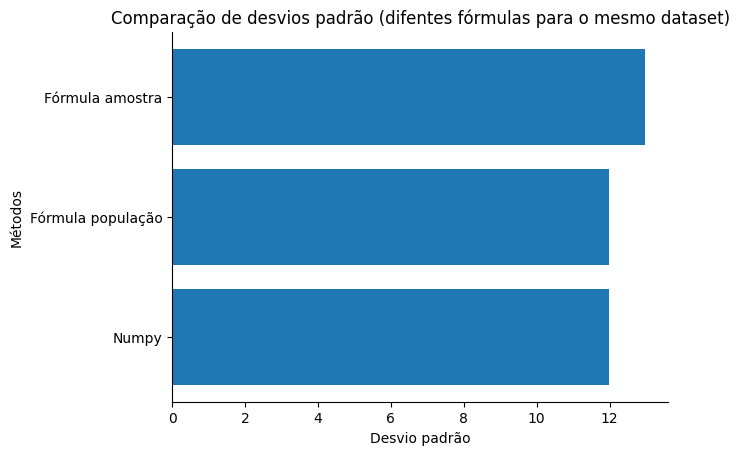

In [42]:
plt.barh(['Numpy', 'Fórmula população', 'Fórmula amostra'],
         [dp, dppA, dpaA])
plt.title('Comparação de desvios padrão (difentes fórmulas para o mesmo dataset)')
plt.ylabel('Métodos')
plt.xlabel('Desvio padrão')
sns.despine()
     

Propiedades do desvio padrão:

1. Adição de um número constante a cada um dos elementos do conjunto de dados o desvio padrão se mantém.
2. Multiplicando ou divindo cada elmento do conjunto de dados com um número constante o desvio padrão fica multiplicado ou dividido, respectivamente, por este mesmo número.

### 1.4.2 Variância (S²)
Quadrado do desvio padrão

In [43]:
"""
Variância
Como ela refere-se ao quadrado do desvio padrão, basta usar a fórmula do desvio
sem realizar a extração da raiz quadrada
"""
def variancia(dados, tipo=1):
  """
  dados: conjunto de dados no formato lista
  tipo:   1 -> desvio padrão da população (padrão)
          2 -> desvio padrão da amostra
  """
  n = len(dados)
  media = np.mean(dados)

  #Quadrado da diferença entre observações e a média
  s2 = [(dados[k] - media) ** 2 for k in range(0, len(dados))]

  #Soma do quadrado das diferenças
  s2 = sum(s2)

  #Soma dividida pela quantidade de elementos
  #Resulta na variância
  if tipo == 1:
    s2 = s2 / n
  elif tipo == 2:
    s2 = s2 / (n - 1)

  return s2

varA = variancia(empregadoA)
varB = variancia(empregadoB)

print(f'Variância da produção dos empregados:\nA: {varA:.3f}\nB: {varB:.3f}')

Variância da produção dos empregados:
A: 0.400
B: 85.600


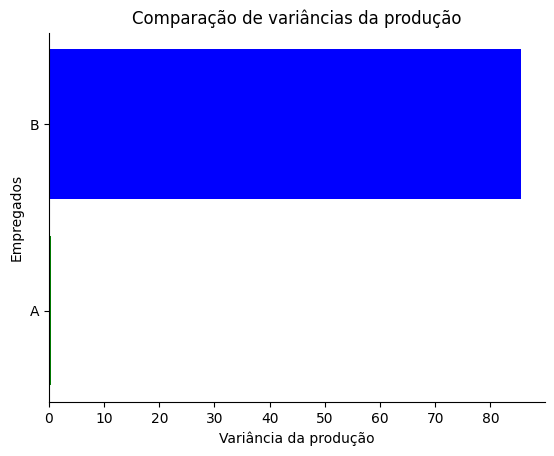

In [44]:
plt.barh(['A', 'B'],
         [varA, varB],
         color=['g', 'b'])
plt.title('Comparação de variâncias da produção')
plt.ylabel('Empregados')
plt.xlabel('Variância da produção')
sns.despine()

In [45]:
#Variância calculada com numpy
print(np.var(empregadoA),
      np.var(empregadoB),
             sep='\n')

0.4
85.6


Propriedades da variância:

1. Primeiras duas propriedades do desvio padrão tem aplicação análoga para variância (adição/subrtação e multiplicação/divisão).
2. Variância combinada

OBSERVAÇÕES: Verificar:

1. Correção de Sheppard para a variância para observar tratamento de distorções que podem ocorrer no cálculo em dados agrupados em classes de freqência em função da dispersão dos dados em cada classe.
2. Controle de Charlier para conferência da exatidão de cálculos de média, variância e desvio padrão